Daily Challenge

In [ ]:
# Importation de la bibliothèque pandas pour la manipulation des données
import pandas as pd
from google.colab import drive
# Lecture du csv
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/W2/D4/2019.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [ ]:
df.isnull()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
151,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,False
153,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


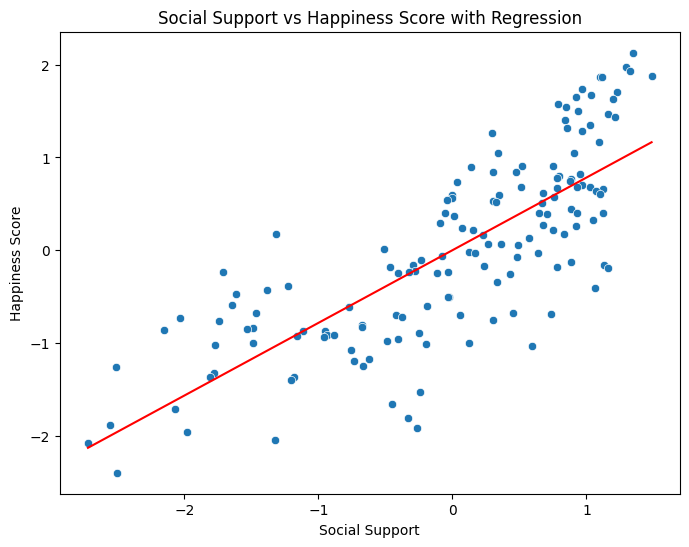

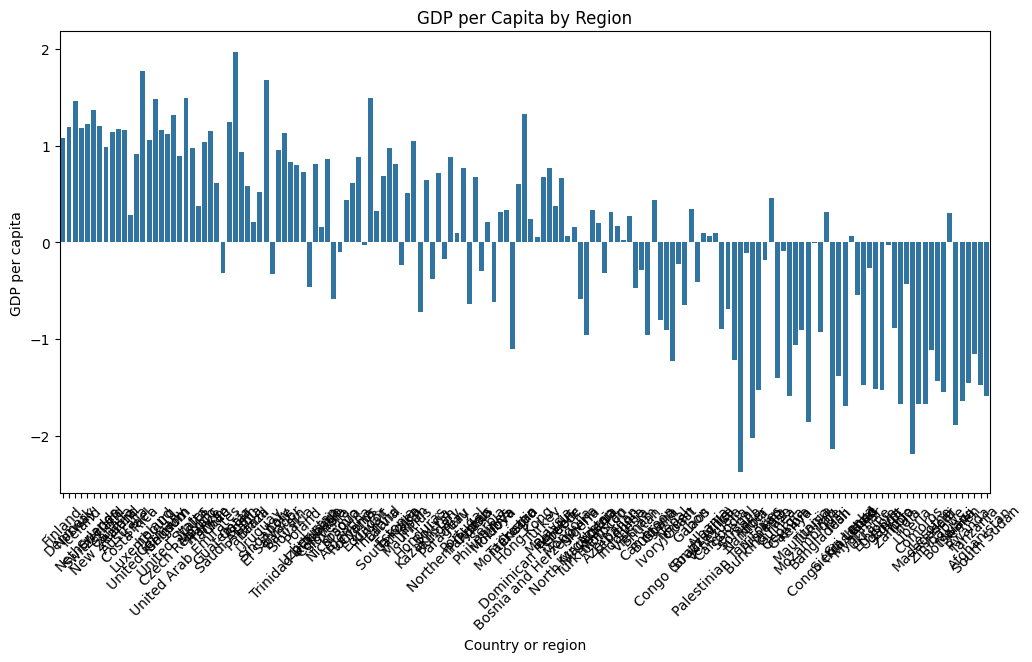

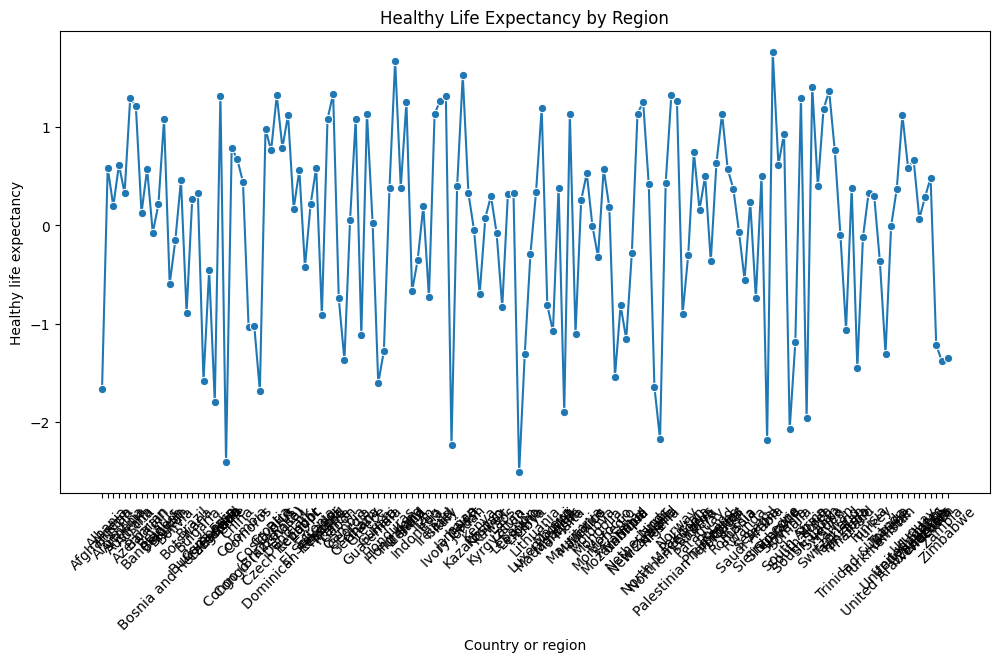

In [ ]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Filtrer pour l'année 2019 si la colonne existe
if 'Year' in df.columns:
    df = df[df['Year'] == 2019]

# Nettoyage: supprimer valeurs manquantes
df = df.dropna()

# Conversion en numérique
cols_num = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy']
for col in cols_num:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=cols_num)

# Détection et suppression outliers (IQR)
for col in cols_num:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]

# Normalisation
scaler = StandardScaler()
df[cols_num] = scaler.fit_transform(df[cols_num])

# Encodage catégoriel si présent
cat_col = 'Country or region'
if cat_col in df.columns:
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded = encoder.fit_transform(df[[cat_col]])
    df = pd.concat([df.reset_index(drop=True), pd.DataFrame(encoded, columns=encoder.get_feature_names_out([cat_col]))], axis=1)

# Relation 'Social support' vs 'Score' + régression
X = df[['Social support']]
y = df['Score']
model = LinearRegression().fit(X, y)
x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_preds = model.predict(x_vals)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X.squeeze(), y=y)
plt.plot(x_vals, y_preds, color='red')
plt.title('Social Support vs Happiness Score with Regression')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.show()

# Comparaison régionale si colonne présente
if 'Country or region' in df.columns:
    # GPD par région
    plt.figure(figsize=(12,6))
    sns.barplot(data=df, x='Country or region', y='GDP per capita')
    plt.xticks(rotation=45)
    plt.title('GDP per Capita by Region')
    plt.show()
    # Espérance de vie moyenne
    region_health = df.groupby('Country or region')['Healthy life expectancy'].mean().reset_index()
    plt.figure(figsize=(12,6))
    sns.lineplot(data=region_health, x='Country or region', y='Healthy life expectancy', marker='o')
    plt.xticks(rotation=45)
    plt.title('Healthy Life Expectancy by Region')
    plt.show()